importing all necessary libraries


In [33]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [35]:
data=pd.read_csv('./data/Training.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [36]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [37]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [38]:
data=data.drop('Unnamed: 133',axis=1)

In [39]:
data.isna().sum().sum()

0

In [40]:
data.shape

(4920, 133)

In [41]:
data.shape

(4920, 133)

In [42]:
diseases=data['prognosis'].value_counts()

In [43]:
diseases

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

<Axes: xlabel='count', ylabel='prognosis'>

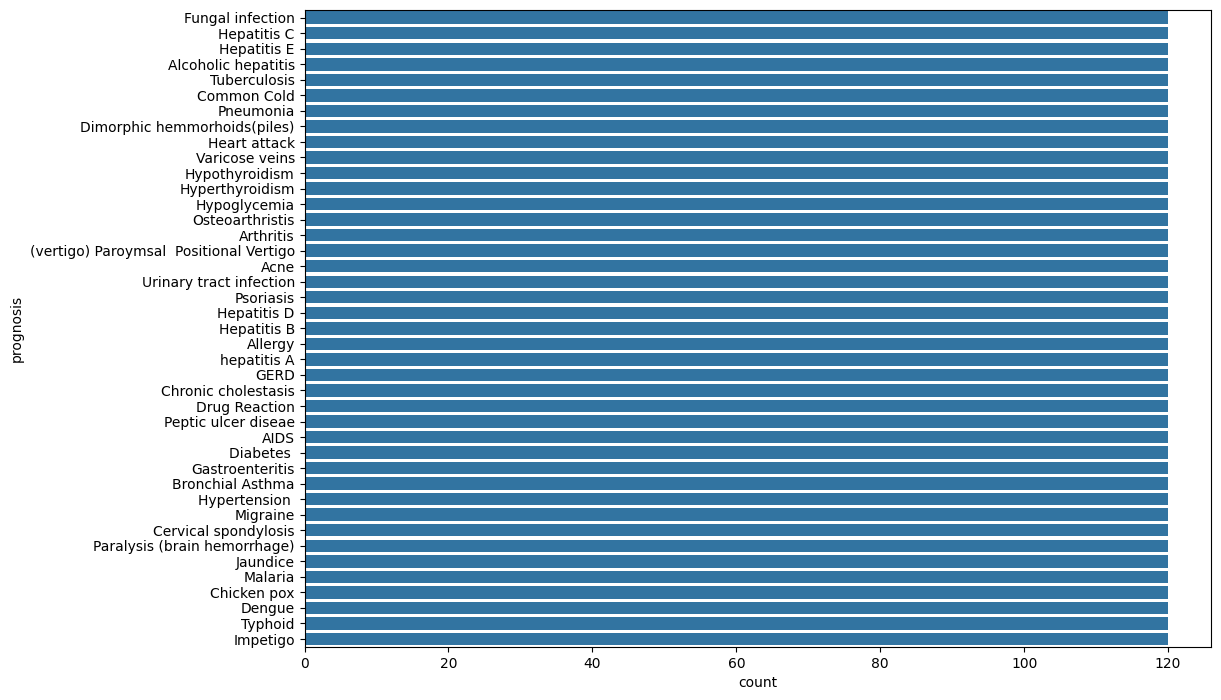

In [44]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax,data=diseases,orient='h')

In [45]:
disease=data['prognosis'].unique()
disease

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

<Axes: >

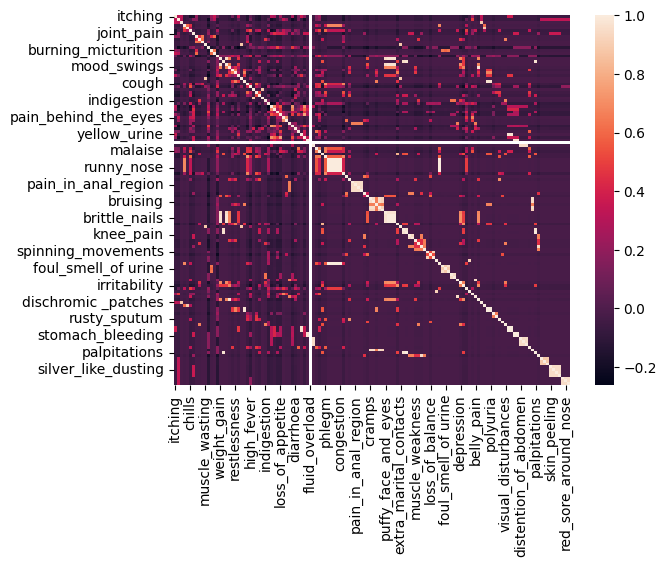

In [46]:
sns.heatmap(data.iloc[:,:-1].corr())

In [47]:
x,y=data.iloc[:,:-1],data.iloc[:,-1]

In [48]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y)


In [50]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}
print("=="*30)
# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	model.fit(x_train,y_train)
	scores = cross_val_score(model, x, y, cv = 10, 
							n_jobs = -1, 
							scoring = cv_scoring)
	
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")
	print("=="*30)


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [51]:

test_data=pd.read_csv("./data/Testing.csv")

In [52]:
Train_x,Train_y=data.iloc[:,:-1],data.iloc[:,-1]
test_x,test_y=test_data.iloc[:,:-1],test_data.iloc[:,-1]
train_x_train,train_x_test,train_y_train,train_y_test=train_test_split(Train_x,Train_y)


Accuracy on train data by  SVC()  Classifier\    : 100.0
Accuracy on test data by  SVC()  Classifier\    :  100.0


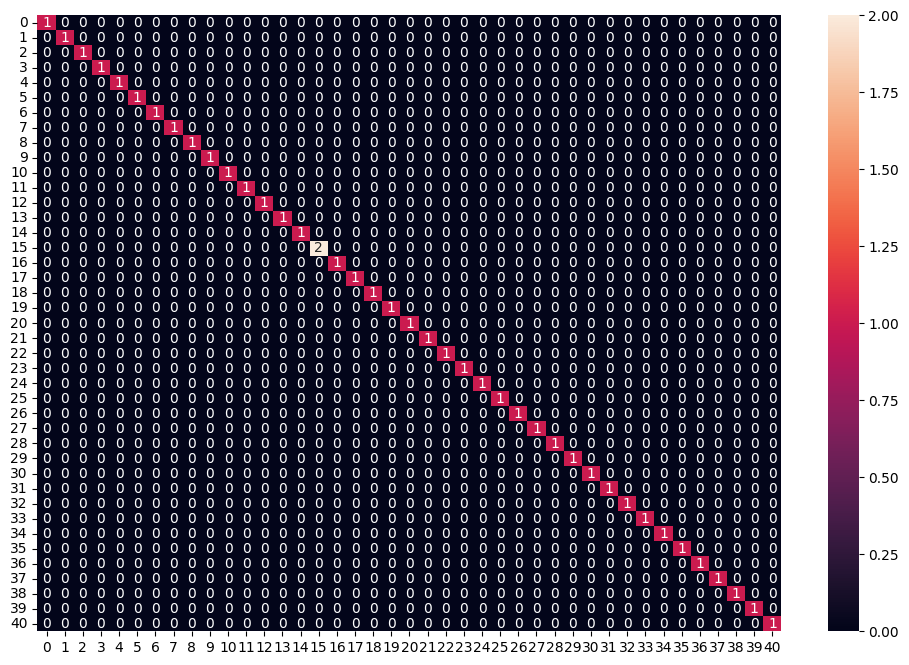

In [58]:

model=SVC()




model.fit(train_x_train, train_y_train)
preds = model.predict(train_x_test)
print("Accuracy on train data by ",model," Classifier\    :", accuracy_score(train_y_test, model.predict(train_x_test))*100)
preds = model.predict(test_x)
print("Accuracy on test data by ",model," Classifier\    : ",accuracy_score(test_y, preds)*100)

cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
  #plt.title("Confusion Matrix for ",model," Classifier on Test Data")
plt.show()


Accuracy on train data by  GaussianNB()  Classifier\    : 100.0
Accuracy on test data by  GaussianNB()  Classifier\    :  100.0


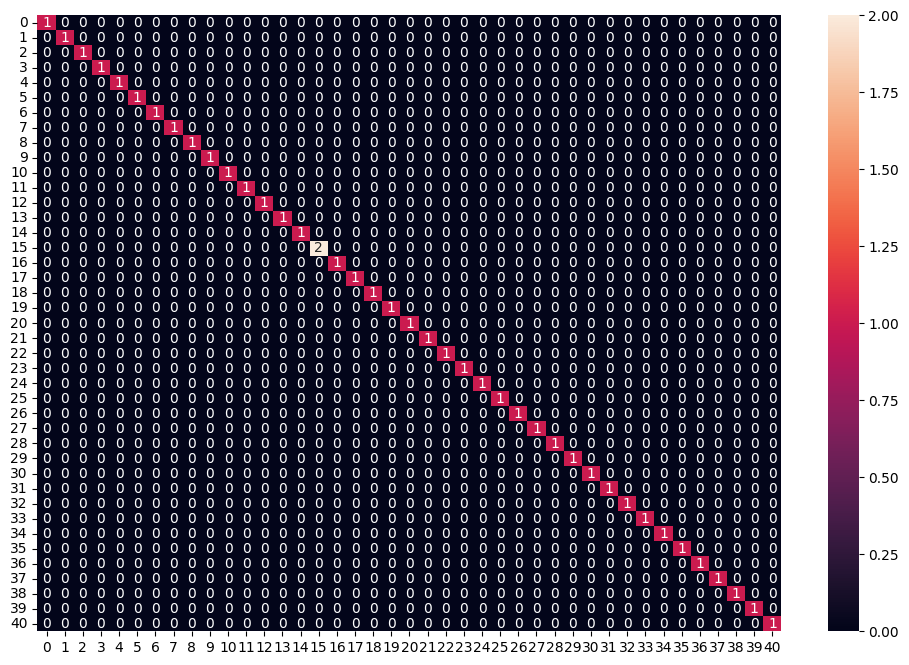

In [54]:

model=GaussianNB()




model.fit(train_x_train, train_y_train)
preds = model.predict(train_x_test)
print("Accuracy on train data by ",model," Classifier\    :", accuracy_score(train_y_test, model.predict(train_x_test))*100)
preds = model.predict(test_x)
print("Accuracy on test data by ",model," Classifier\    : ",accuracy_score(test_y, preds)*100)
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
  #plt.title("Confusion Matrix for ",model," Classifier on Test Data")
plt.show()


Accuracy on train data by  RandomForestClassifier(random_state=18)  Classifier\    : 100.0
Accuracy on test data by  RandomForestClassifier(random_state=18)  Classifier\    :  97.61904761904762


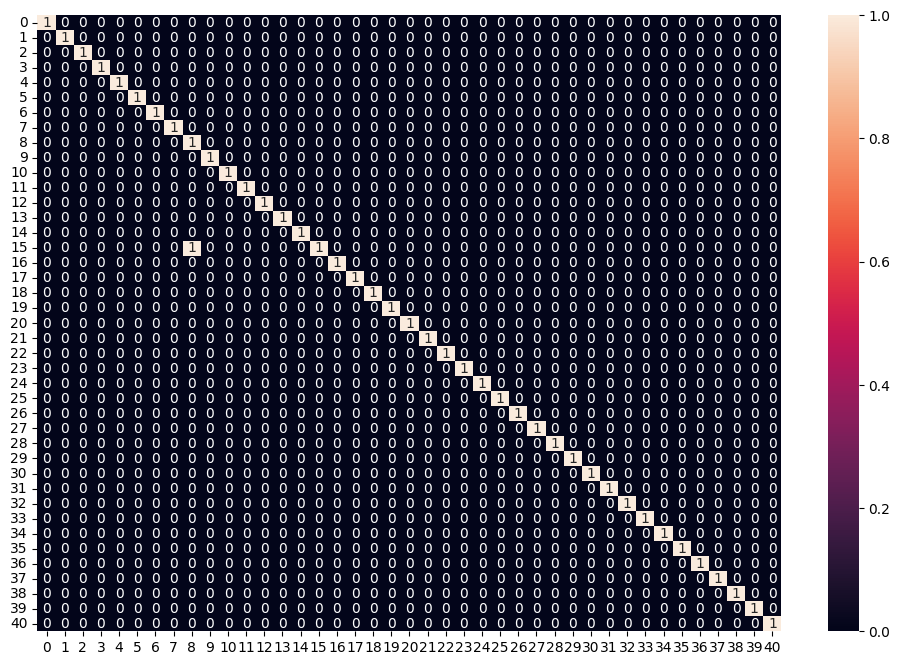

In [55]:

model=RandomForestClassifier(random_state=18)




model.fit(train_x_train, train_y_train)
preds = model.predict(train_x_test)
print("Accuracy on train data by ",model," Classifier\    :", accuracy_score(train_y_test, model.predict(train_x_test))*100)
preds = model.predict(test_x)
print("Accuracy on test data by ",model," Classifier\    : ",accuracy_score(test_y, preds)*100)
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
  #plt.title("Confusion Matrix for ",model," Classifier on Test Data")
plt.show()
